### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

### Реализация градиентного спуска

In [2]:
def gradient_descent(X, y, w, learning_rate=0.001, iterations=10000):
    N = len(y)
    costs = np.zeros(iterations)
    for it in range(iterations):
        prediction = np.dot(X, w)
        w = w - (2/N) * learning_rate * (X.T.dot(prediction - y)) # 2*X.T.dot(prediction - y)/N - производная MSE
        costs[it] = MSE(X, y, w)
    return w, costs

### Среднеквадратичное отклонение

In [3]:
def MSE(X, y, w):
    N = len(y)
    predictions = X.dot(w)
    MSE = np.sum(np.square(predictions-y)) * (1/N)
    return MSE

### Генерация данных

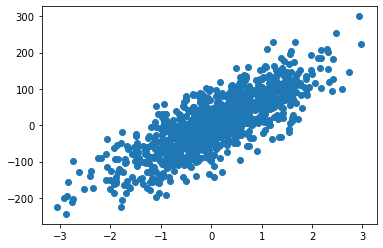

In [4]:
X, y = datasets.make_regression(n_samples=1000, n_features=1, noise=50, shuffle=True)
plt.scatter(X, y)
plt.show()

In [5]:
X = np.hstack(([[1]]*X.shape[0], X))
X

array([[ 1.        ,  0.52796403],
       [ 1.        , -0.38174394],
       [ 1.        ,  0.31657403],
       ...,
       [ 1.        , -0.75225084],
       [ 1.        ,  2.1856188 ],
       [ 1.        ,  1.18773552]])

In [6]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.3)

In [7]:
w = [np.random.random() for i in range(len(X[0]))]

### Обучение

In [8]:
w, costs = gradient_descent(train_X, train_y, w, learning_rate=0.001, iterations=10000)

print(f'w0:          {w[0]}\nw1:          {w[1]}')
print(f'Final cost/MSE:  {costs[-1]}')

w0:          1.6652880810571702
w1:          65.21981227549105
Final cost/MSE:  2466.287890903022


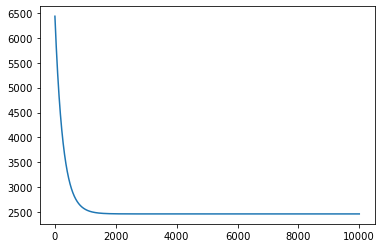

In [9]:
plt.plot([i for i in range(10000)], costs)

### Предсказание

In [10]:
res = np.dot(val_X, w)

### Визуализация / сравнение

<ipython-input-11-c4c3899781c8>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()
<ipython-input-11-c4c3899781c8>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


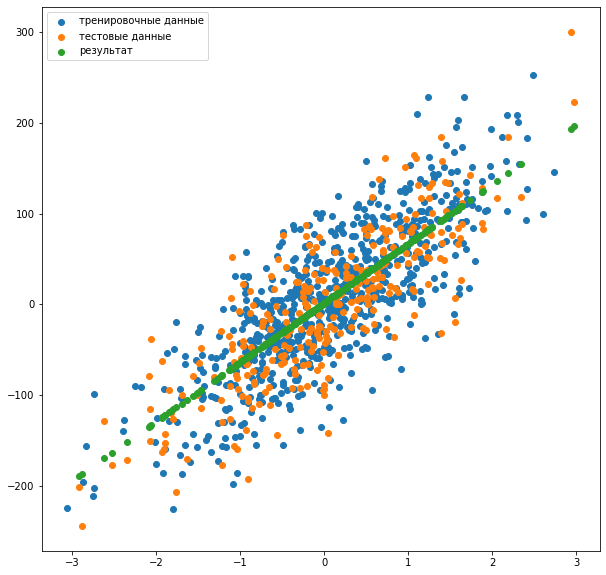

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.scatter(train_X[:, 1], train_y, label='тренировочные данные')
ax = fig.add_subplot()
ax.scatter(val_X[:, 1], val_y, label='тестовые данные')
ax = fig.add_subplot()
ax.scatter(val_X[:, 1], res, label='результат')

ax.legend()